In [361]:
# Import libraries
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv('Olympics_Medallists_2024.csv')  # Replace with your dataset path


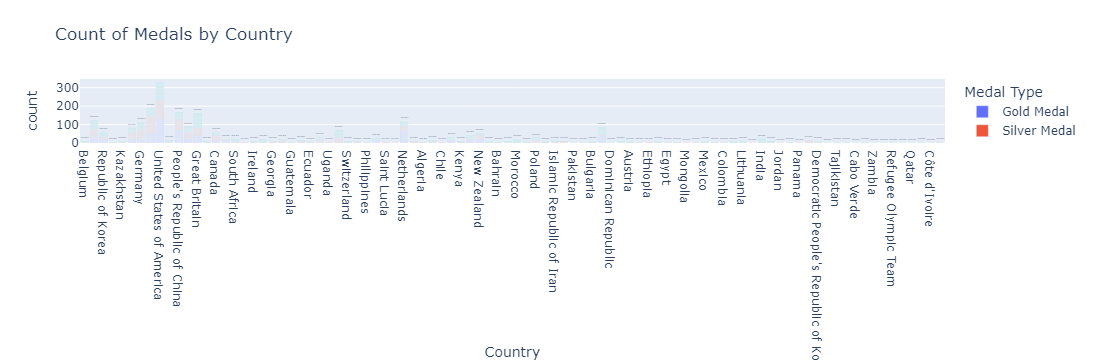

In [362]:
# Bar Chart: Count of medals by country
bar_chart = px.bar(df, 
                   x='country_long', 
                   title='Count of Medals by Country', 
                   color='medal_type', 
                   labels={'country_long': 'Country', 'medal_type': 'Medal Type'},
                   text='medal_type')
bar_chart.show()


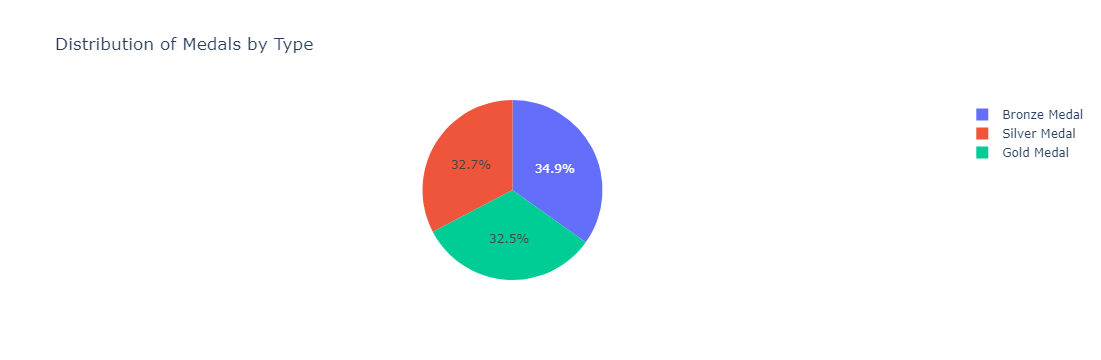

In [363]:
# Pie Chart: Distribution of medals by type
# Count the occurrences of each medal type
medal_counts = df['medal_type'].value_counts().reset_index()
medal_counts.columns = ['medal_type', 'count']

# Create the pie chart
pie_chart = px.pie(medal_counts, 
                   names='medal_type', 
                   values='count', 
                   title='Distribution of Medals by Type', 
                   labels={'medal_type': 'Medal Type'})
pie_chart.show()


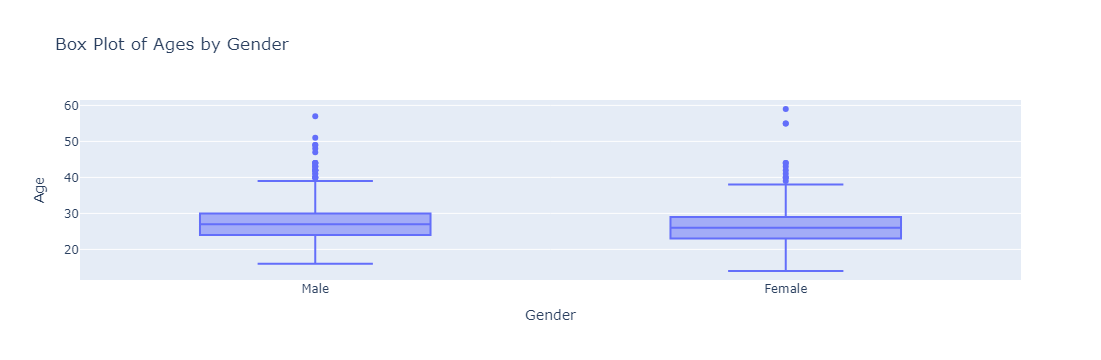

In [364]:
# Box Plot: Ages by gender (assuming birth_date is converted to age)
# Convert birth_date to age
from datetime import datetime

current_year = datetime.now().year
df['age'] = current_year - pd.to_datetime(df['birth_date'], errors='coerce').dt.year

box_plot = px.box(df, 
                  x='gender', 
                  y='age', 
                  title='Box Plot of Ages by Gender', 
                  labels={'gender': 'Gender', 'age': 'Age'})
box_plot.show()


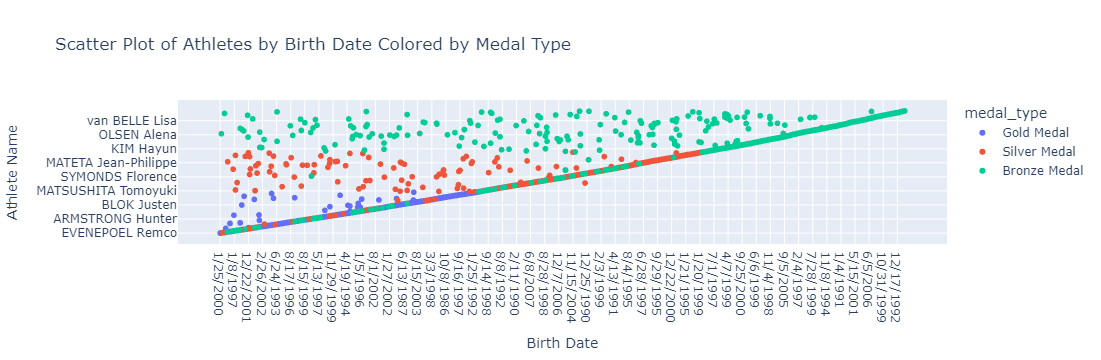

In [365]:
# Scatter Plot: Birth dates of athletes colored by medal type
scatter_plot = px.scatter(df, 
                          x='birth_date', 
                          y='name', 
                          color='medal_type', 
                          title='Scatter Plot of Athletes by Birth Date Colored by Medal Type',
                          labels={'birth_date': 'Birth Date', 'name': 'Athlete Name'})
scatter_plot.show()


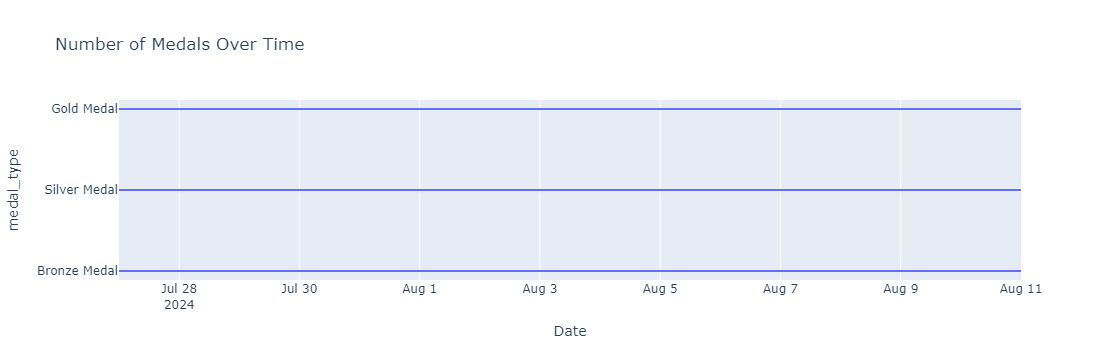

In [366]:
# Line Chart: Number of medals over time (medal_date)
# Convert medal_date to datetime
df['medal_date'] = pd.to_datetime(df['medal_date'], errors='coerce')

line_chart = px.line(df, 
                     x='medal_date', 
                     title='Number of Medals Over Time', 
                     labels={'medal_date': 'Date'},
                     line_group='medal_type', 
                     y='medal_type', 
                     line_shape='linear')
line_chart.show()


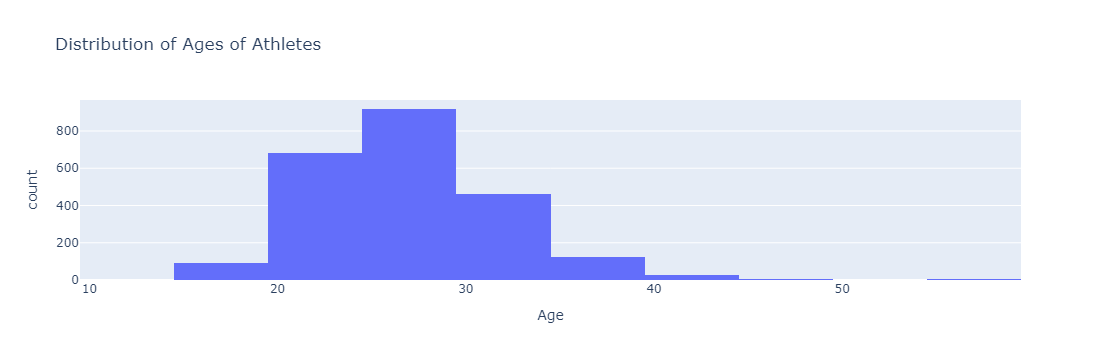

In [367]:
# Histogram: Distribution of ages of athletes
histogram = px.histogram(df, 
                         x='age', 
                         title='Distribution of Ages of Athletes',
                         labels={'age': 'Age'},
                         nbins=20)
histogram.show()


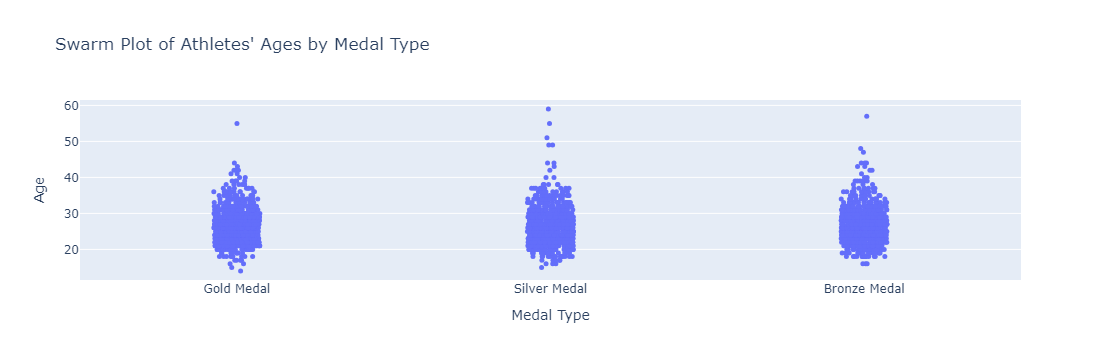

In [368]:
# Swarm Plot: Athletes' ages by medal type
swarm_plot = px.strip(df, 
                      x='medal_type', 
                      y='age', 
                      title='Swarm Plot of Athletes\' Ages by Medal Type',
                      labels={'medal_type': 'Medal Type', 'age': 'Age'},
                      stripmode='overlay')  # Overlay mode for better visualization
swarm_plot.update_traces(marker=dict(size=5))  # Adjust marker size if needed
swarm_plot.show()


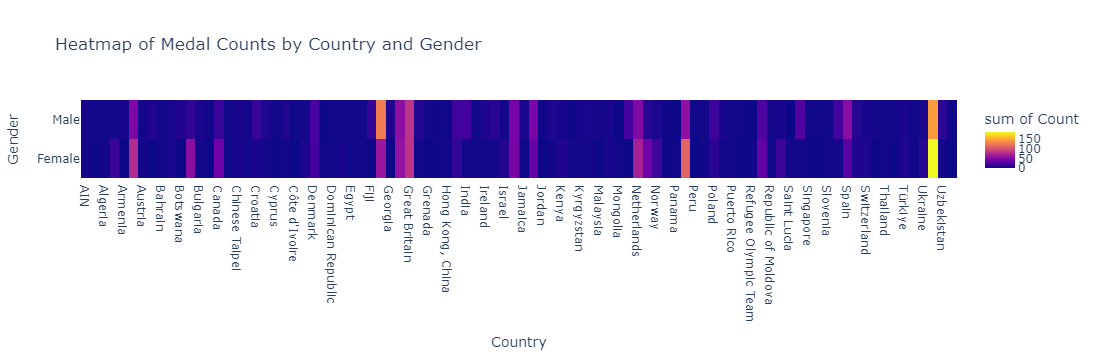

In [369]:
# Heatmap: Count of medals by country and gender
heatmap_data = df.groupby(['country_long', 'gender']).size().reset_index(name='counts')
heatmap = px.density_heatmap(heatmap_data, 
                              x='country_long', 
                              y='gender', 
                              z='counts', 
                              title='Heatmap of Medal Counts by Country and Gender',
                              labels={'country_long': 'Country', 'gender': 'Gender', 'counts': 'Count'})
heatmap.show()


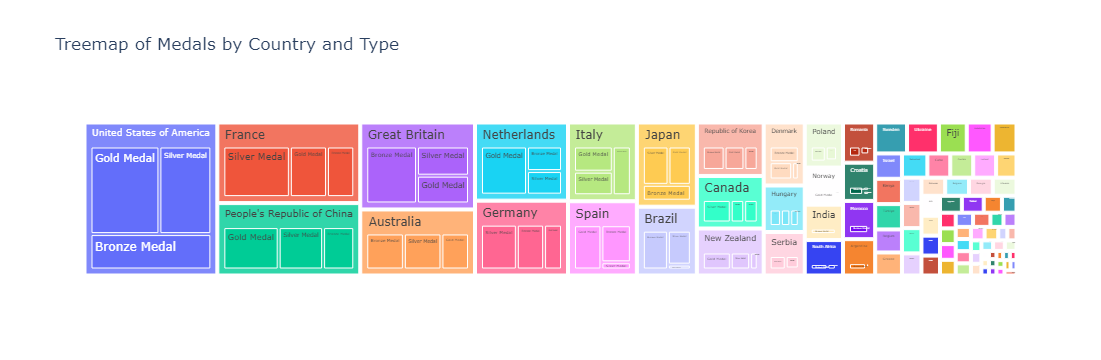

In [370]:
# Treemap: Medals by country and type
# Count medals for each country and type
treemap_data = df.groupby(['country_long', 'medal_type']).size().reset_index(name='count')

treemap = px.treemap(treemap_data, 
                     path=['country_long', 'medal_type'], 
                     values='count', 
                     title='Treemap of Medals by Country and Type',
                     labels={'country_long': 'Country', 'medal_type': 'Medal Type'})
treemap.show()


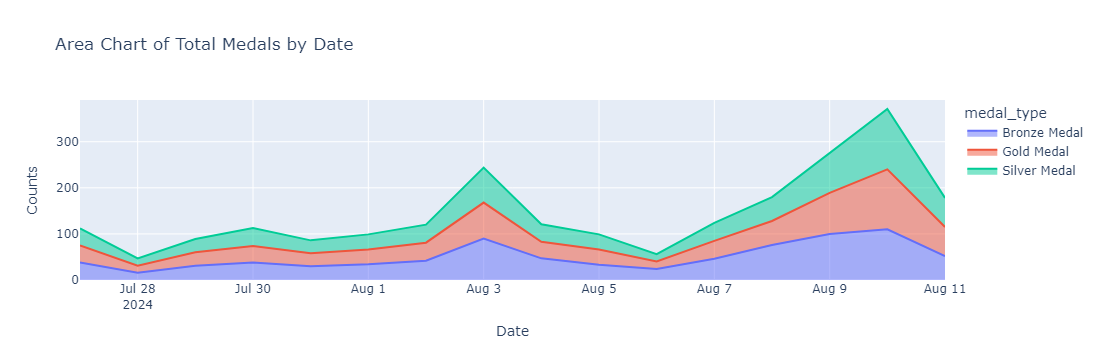

In [371]:
# Area Chart: Total medals by date
area_data = df.groupby(['medal_date', 'medal_type']).size().reset_index(name='counts')
area_chart = px.area(area_data, 
                     x='medal_date', 
                     y='counts', 
                     color='medal_type', 
                     title='Area Chart of Total Medals by Date',
                     labels={'medal_date': 'Date', 'counts': 'Counts'})
area_chart.show()


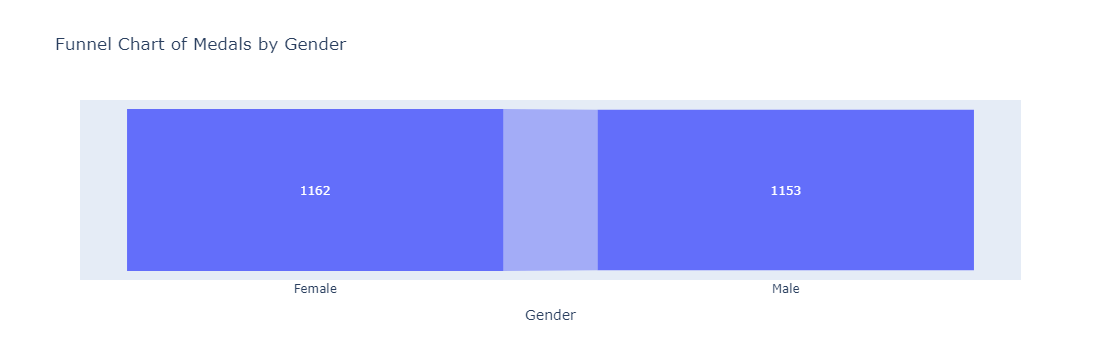

In [372]:
# Funnel Chart: Medals by gender
funnel_data = df.groupby('gender').size().reset_index(name='counts')
funnel_chart = px.funnel(funnel_data, 
                          x='gender', 
                          y='counts', 
                          title='Funnel Chart of Medals by Gender',
                          labels={'gender': 'Gender', 'counts': 'Counts'})
funnel_chart.show()


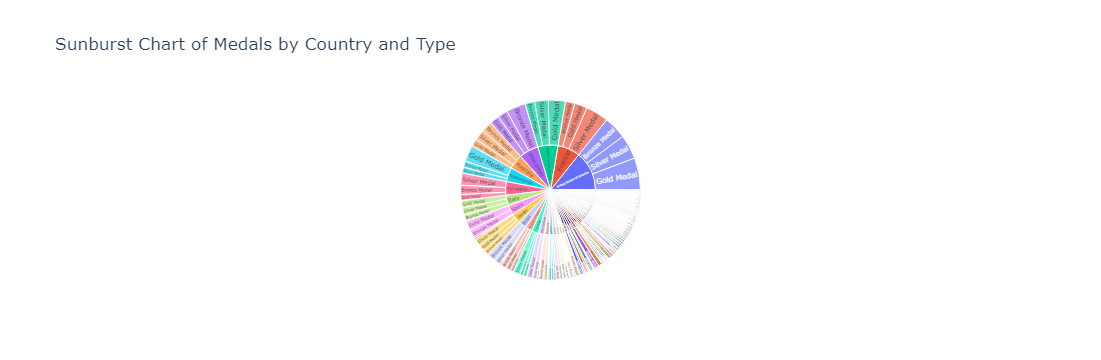

In [373]:
# Sunburst Chart: Medals by country and medal type
# Count medals for each country and type
sunburst_data = df.groupby(['country_long', 'medal_type']).size().reset_index(name='count')

sunburst = px.sunburst(sunburst_data, 
                       path=['country_long', 'medal_type'], 
                       values='count', 
                       title='Sunburst Chart of Medals by Country and Type',
                       labels={'country_long': 'Country', 'medal_type': 'Medal Type'})
sunburst.show()


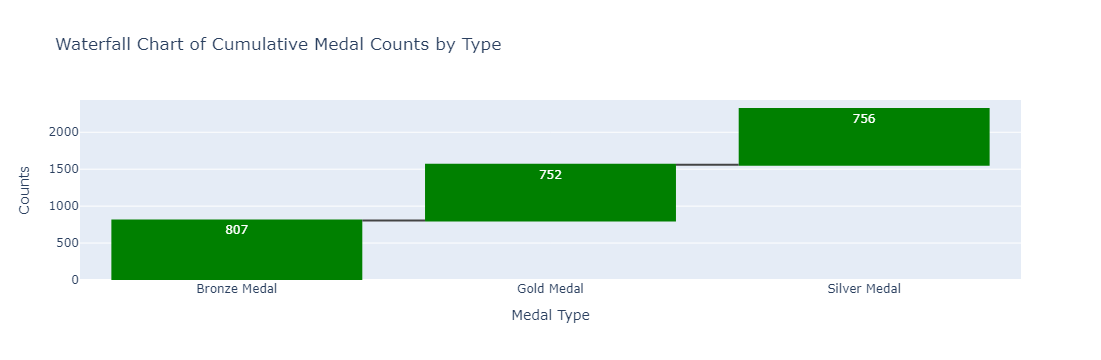

In [374]:
import plotly.graph_objects as go

# Prepare the data for the waterfall chart
waterfall_data = df.groupby('medal_type').size().reset_index(name='counts')

# Calculate cumulative counts for the waterfall
waterfall_data['cumulative'] = waterfall_data['counts'].cumsum()

# Create the waterfall chart
waterfall_chart = go.Figure(go.Waterfall(
    name="Cumulative Medal Counts",
    x=waterfall_data['medal_type'],
    y=waterfall_data['counts'],
    text=waterfall_data['counts'],
    hoverinfo="text+x+y",
    increasing={"marker":{"color":"green"}},
    decreasing={"marker":{"color":"red"}},
    totals={"marker":{"color":"blue"}}
))

# Update layout
waterfall_chart.update_layout(title='Waterfall Chart of Cumulative Medal Counts by Type',
                               xaxis_title='Medal Type',
                               yaxis_title='Counts')

# Show the chart
waterfall_chart.show()


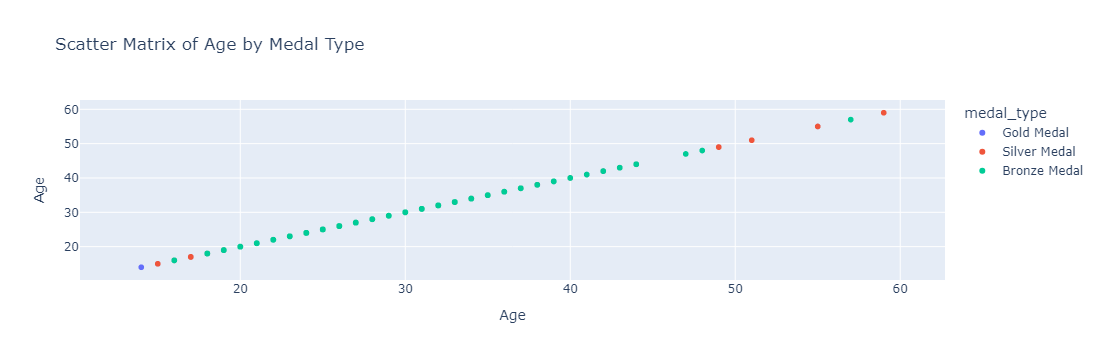

In [375]:
# Scatter Matrix: Scatter plot matrix of age by medal type
scatter_matrix = px.scatter_matrix(df, 
                                    dimensions=['age'], 
                                    color='medal_type', 
                                    title='Scatter Matrix of Age by Medal Type',
                                    labels={'age': 'Age'})
scatter_matrix.show()


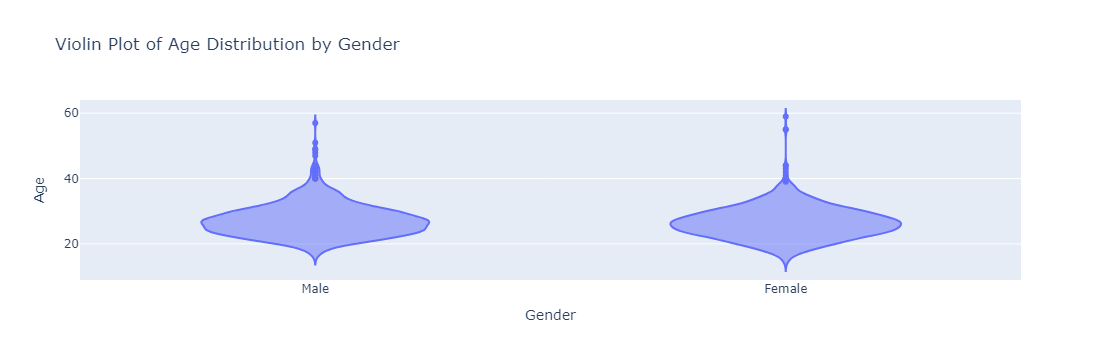

In [376]:
# Violin Plot: Age distribution by gender
violin_plot = px.violin(df, 
                        x='gender', 
                        y='age', 
                        title='Violin Plot of Age Distribution by Gender',
                        labels={'gender': 'Gender', 'age': 'Age'})
violin_plot.show()


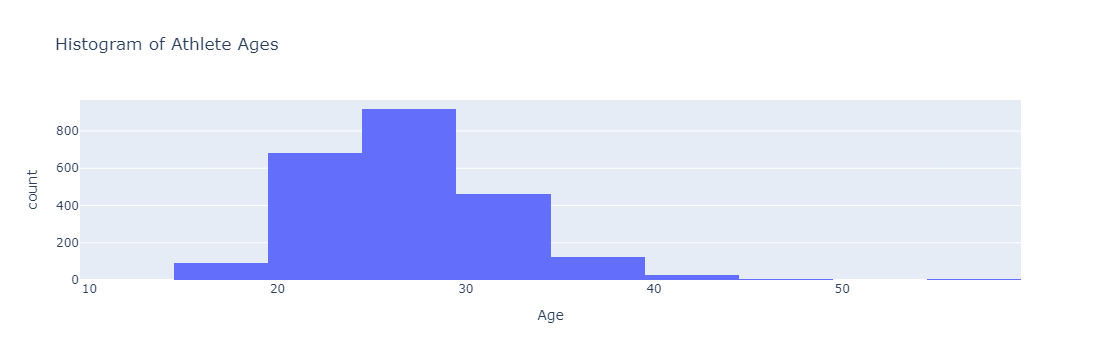

In [377]:
# Histogram: Distribution of athlete ages
histogram = px.histogram(df, 
                         x='age', 
                         title='Histogram of Athlete Ages',
                         labels={'age': 'Age'},
                         nbins=20)
histogram.show()


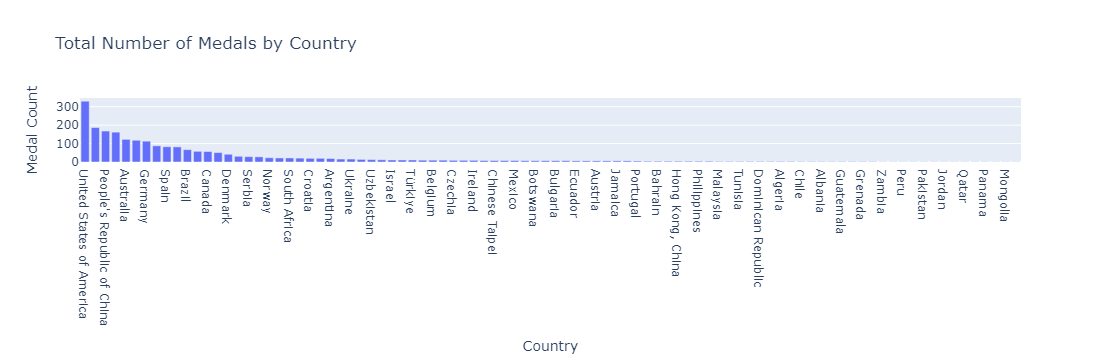

In [378]:
# Bar Chart: Total number of medals by country
bar_data = df['country_long'].value_counts().reset_index()
bar_data.columns = ['country_long', 'medal_count']  # Rename the columns for clarity

bar_chart = px.bar(bar_data, 
                   x='country_long', 
                   y='medal_count', 
                   title='Total Number of Medals by Country',
                   labels={'country_long': 'Country', 'medal_count': 'Medal Count'})

bar_chart.show()


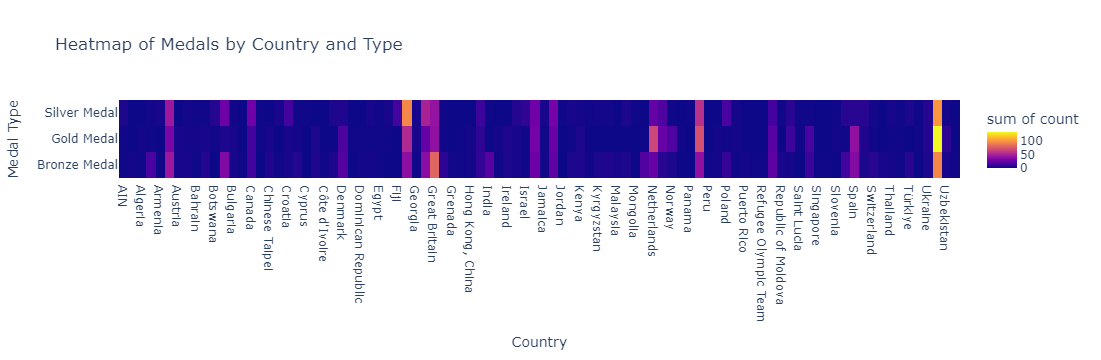

In [379]:
# Heatmap: Count of medals by country and medal type
heatmap_data = df.groupby(['country_long', 'medal_type']).size().reset_index(name='count')
heatmap = px.density_heatmap(heatmap_data, 
                              x='country_long', 
                              y='medal_type', 
                              z='count',
                              title='Heatmap of Medals by Country and Type',
                              labels={'country_long': 'Country', 'medal_type': 'Medal Type'})
heatmap.show()


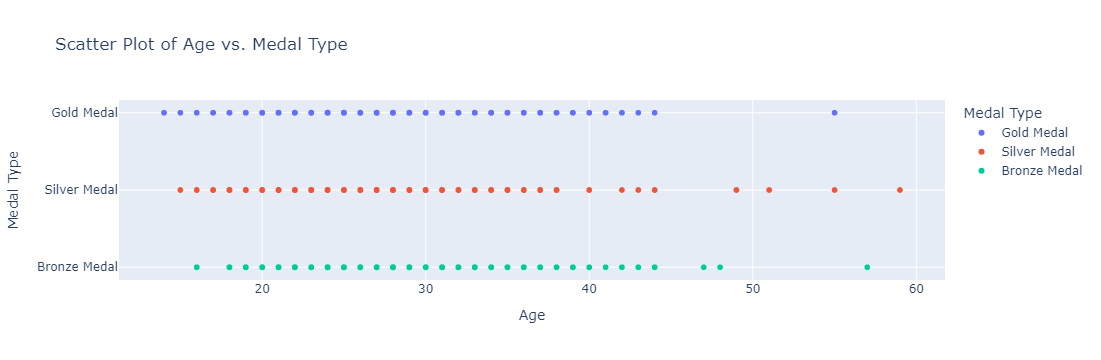

In [380]:
# Scatter Plot: Age vs. Medal Type
scatter_plot = px.scatter(df, 
                          x='age', 
                          y='medal_type', 
                          color='medal_type', 
                          title='Scatter Plot of Age vs. Medal Type',
                          labels={'age': 'Age', 'medal_type': 'Medal Type'})
scatter_plot.show()


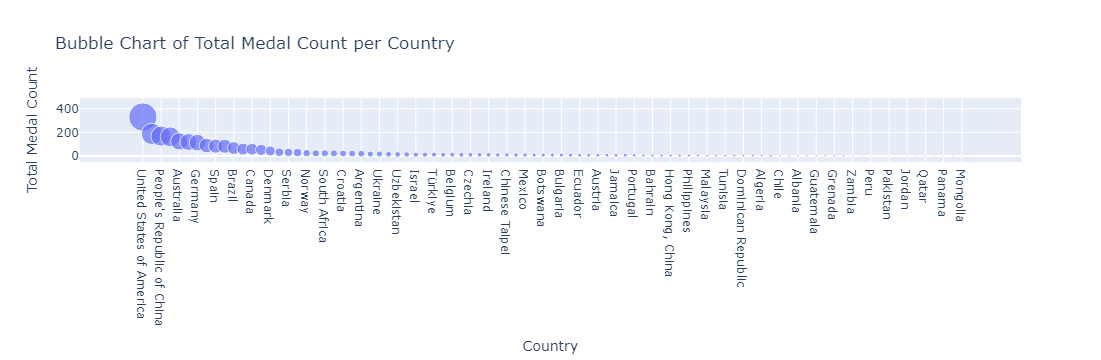

In [381]:
# Bubble Chart: Total medal count per country, sized by the number of athletes
bubble_data = df['country_long'].value_counts().reset_index()
bubble_data.columns = ['country_long', 'medal_count']  # Rename columns for clarity

# Calculate the number of athletes per country
bubble_data['num_athletes'] = df['country_long'].value_counts().reset_index(drop=True)

bubble_chart = px.scatter(bubble_data, 
                          x='country_long',  # Use the correct column name
                          y='medal_count', 
                          size='num_athletes',
                          title='Bubble Chart of Total Medal Count per Country',
                          labels={'country_long': 'Country', 'medal_count': 'Total Medal Count'})

bubble_chart.show()


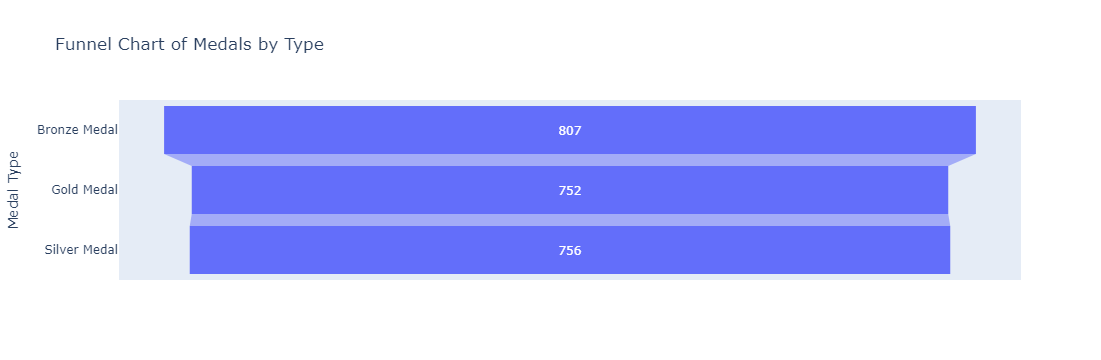

In [382]:
# Funnel Chart: Progression of medals by type
funnel_data = df.groupby('medal_type').size().reset_index(name='counts')
funnel_chart = px.funnel(funnel_data, 
                          x='counts', 
                          y='medal_type', 
                          title='Funnel Chart of Medals by Type',
                          labels={'medal_type': 'Medal Type', 'counts': 'Counts'})
funnel_chart.show()


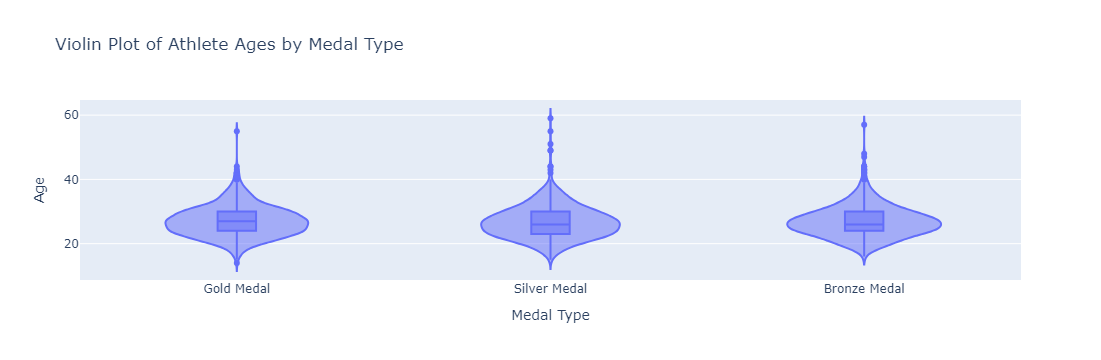

In [383]:
# Violin Plot: Distribution of ages by medal type
violin_plot = px.violin(df, 
                        x='medal_type', 
                        y='age', 
                        title='Violin Plot of Athlete Ages by Medal Type',
                        labels={'medal_type': 'Medal Type', 'age': 'Age'},
                        box=True)
violin_plot.show()


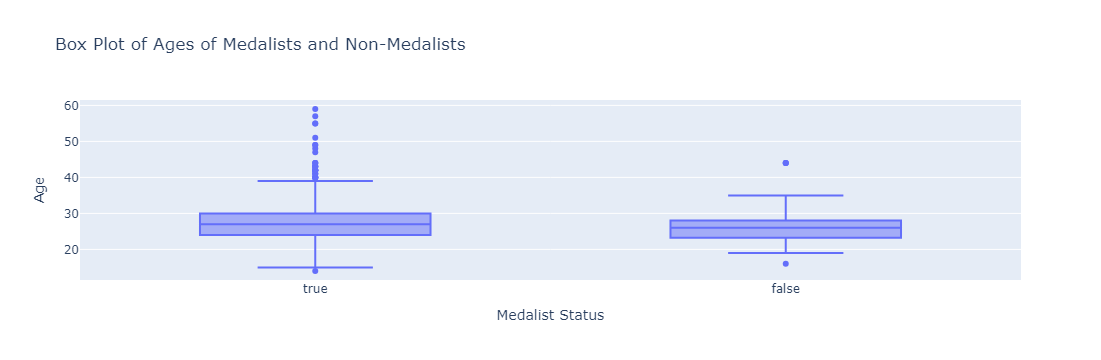

In [384]:
# Box Plot: Compare the distribution of ages of medalists and non-medalists
box_plot = px.box(df, 
                  x='is_medallist', 
                  y='age', 
                  title='Box Plot of Ages of Medalists and Non-Medalists',
                  labels={'is_medallist': 'Medalist Status', 'age': 'Age'})
box_plot.show()


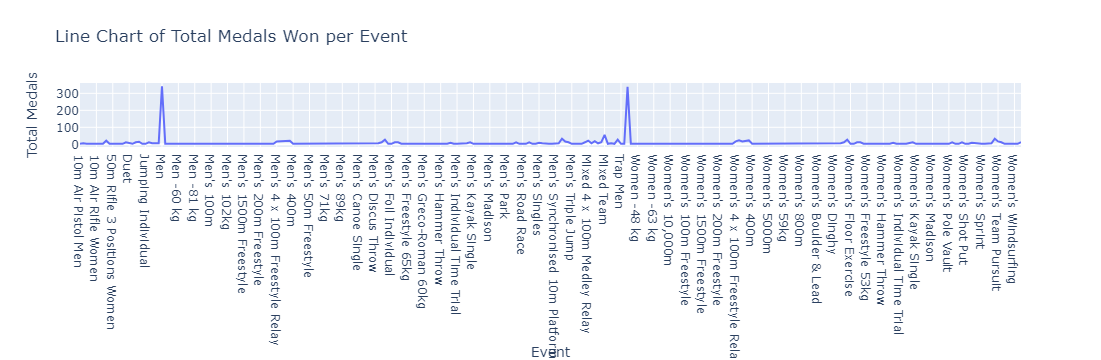

In [385]:
# Line Chart: Total number of medals won per event
line_data = df.groupby('event').size().reset_index(name='counts')
line_chart = px.line(line_data, 
                     x='event', 
                     y='counts', 
                     title='Line Chart of Total Medals Won per Event',
                     labels={'event': 'Event', 'counts': 'Total Medals'})
line_chart.show()
